In [1]:
from fig_1_151024 import *

params=fig_1()


In [2]:
params.rasters_raw=fig_1.load_data(params,raster=True)
params.pop_stats_raw=pd.read_csv(
    r"D:\Reduced_Datasets_v1\figures\data\pop_stats_raw_2nd_derv_new_class_V11_130423.csv")

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (44,104,108,109,111) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# define  plot params 
plt.style.use('default')
rcParams['font.family'] = 'Arial'
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['font.size'] = 7
rcParams['figure.dpi'] = 300
rcParams['xtick.labelsize']=7
rcParams['ytick.labelsize']=7
rcParams["errorbar.capsize"]=3
rcParams['xtick.major.width']=.5
rcParams["xtick.minor.width"]=.5
rcParams['ytick.major.width']=.5
rcParams["ytick.minor.width"]=.5




In [4]:
pop_stats_all2=params.pop_stats_raw.loc[#(params.pop_stats_raw.ctype2.isin(['cold','cold/warm','warm']))
                        (params.pop_stats_raw.stimtemp=='22.0')
                        &(params.pop_stats_raw.ROI.isin(['VPL','PO','PoT']))
                        &(params.pop_stats_raw.waveforms=='clean')
                        &(params.pop_stats_raw.quality=='good')
                        &(params.pop_stats_raw.ctype2.isin(['cold','cold/warm','warm']))
                        &(~params.pop_stats_raw.animal_id.isin(params.outlier))
                        &(params.pop_stats_raw.functional_classification=='putative_RS')]

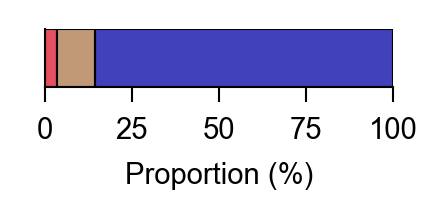

In [5]:
fig,ax=plt.subplots(figsize=(1.5,0.25))
sns.histplot(data=pop_stats_all2,y='quality',hue='ctype2',multiple='fill',
            hue_order=['warm','cold/warm','cold'][::-1],
            palette=[params.red,'#AD7748',params.blue][::-1],shrink=.75,
            legend=False,lw=.5)

ax.set_ylabel('')
ax.set_yticks([])
ax.set_xticks([0,.25,.5,.75,1])
ax.set_xticklabels([0,25,50,75,100])
ax.set_xlabel('Proportion (%)')
sns.despine(fig)
#plt.tight_layout()

#plt.savefig(r'D:\Reduced_Datasets_v1\Thesis\Fig_1\thermal_types_full.svg',format='svg')

In [6]:
data_cold_smooth,colors_cold, data_warm_smooth,colors_warm = fig_1.make_data_heatmaps(
     params)

In [7]:
temp_traces_name = 'temp_traces.npy'

temp_traces_raw = merge_data(params.search_dir,os.listdir(params.search_dir)[:1] ,temp_traces_name)

cold_trace =  (temp_traces_raw[0,:] - 0.2926)*17.0898
warm_trace = (temp_traces_raw[10,:] - 0.2926)*17.0898

C:\Users\tobiasleva\Work\Spatial_Rep_Temp\fig_1_151024.py:255: UserWarning: Use the colorbar set_ticks() method instead.
  cax_2.set_yticks([0, 1])
C:\Users\tobiasleva\Work\Spatial_Rep_Temp\fig_1_151024.py:256: UserWarning: Use the colorbar set_ticks() method instead.
  cax_2.set_ylabel('norm.\n Firing rate ')


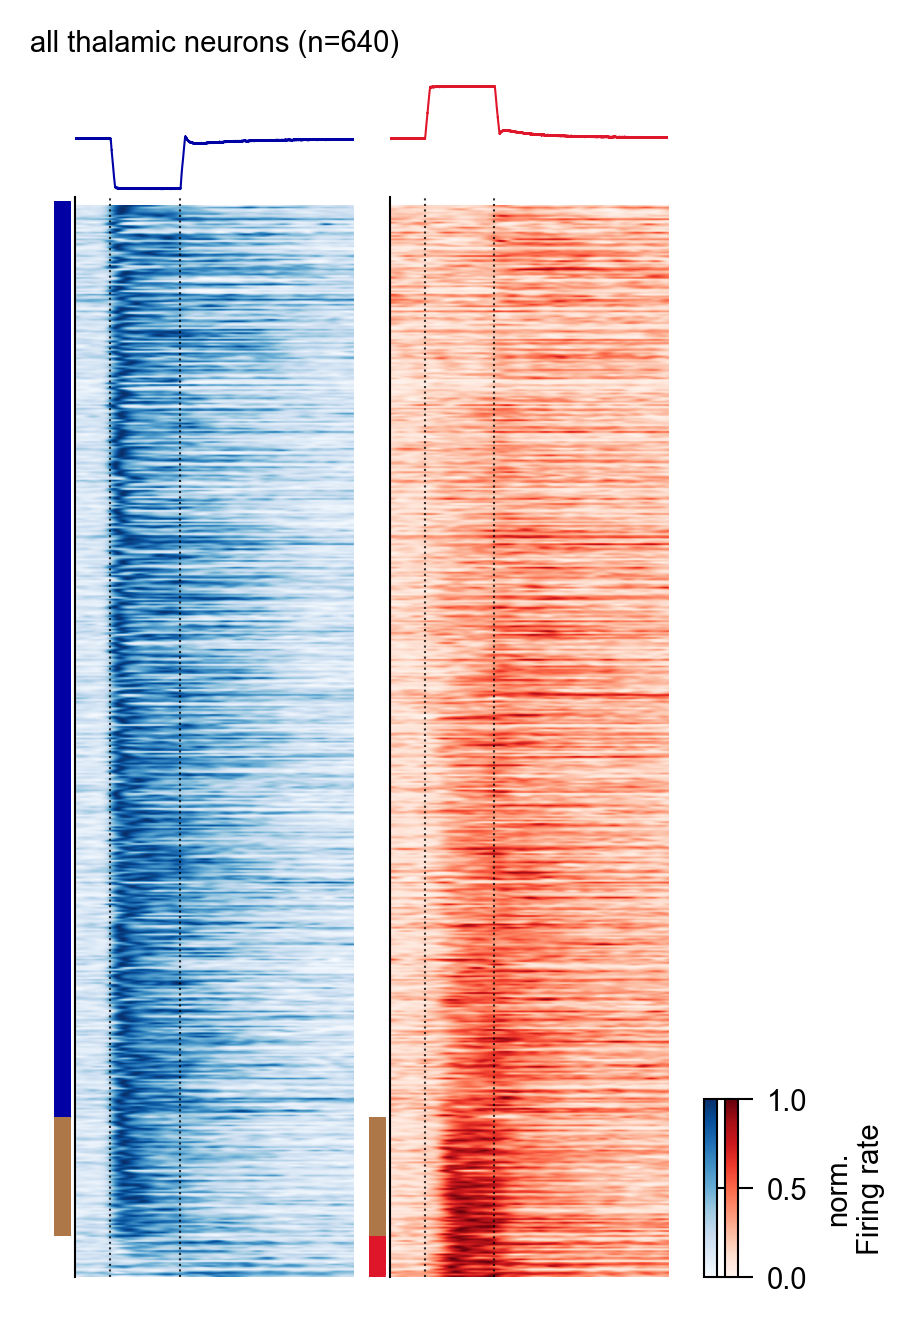

In [22]:
fig_1.plot_heatmaps(params, cold_trace, warm_trace, data_cold_smooth, data_warm_smooth, colors_cold, colors_warm,
                 start_time=8,end_time=16,stim_start=9,stim_duration=2)

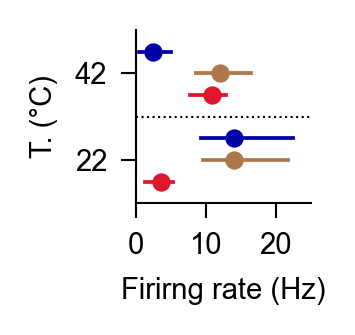

In [43]:
processed_data = fig_1.make_data_frs(params)


fig,ax=plt.subplots(figsize=(.75,.75))
sns.pointplot(data=processed_data,x='base_corr',y='stimtemp',palette=[params.blue,'#AD7748',params.red],
             ax=ax,hue='new_type',dodge=.5,hue_order=['cold','cold/warm','warm'],
              estimator=np.median,errorbar=('pi',50),scale=1.5,join=False,order=['42.0','22.0'][::])

plt.legend([],[], frameon=False)
ax.set_ylabel('T. (°C)')
ax.set_xlabel('Firirng rate (Hz)')
ax.set_xticks([0,10,20])
ax.set_yticklabels([42,22])
ax.set_xlim(0,25)
ax.axhline(0.5,lw=.5,ls=':',color='black')
#ax.set_title('sig. cold respone',fontsize=7)
sns.despine()
#plt.savefig(r'D:\Reduced_processed_datasets_v1\Thesis\Fig_1\frs.svg',format='svg')

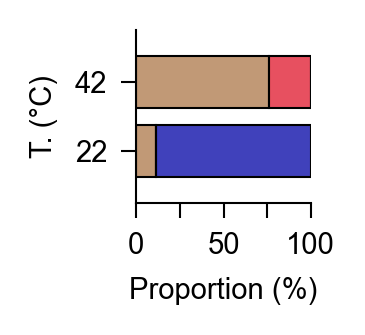

In [56]:
processed_data = make_data_fractions(params)

fig,ax_list=plt.subplots(1,1,figsize=(0.75,.75))
ax=ax_list
sns.histplot(data=processed_data,y='stimtemp',hue='new_type',multiple='fill',
            legend=False,ax=ax,palette=[params.blue,params.red,'#AD7748'],hue_order=['cold','warm','cold/warm'],
            lw=.5,shrink = 0.75)

ax.set_ylabel('T. (°C)')
ax.set_xlabel('Proportion (%)')
ax.set_xticks([0,.25,.5,.75,1])
ax.set_xticklabels(['0','','50','','100'])
ax.set_yticklabels([22,42])
ax.set_ylim(-.75,1.75)
#ax.set_title('Cold Response',fontsize=7)

sns.despine()
#plt.savefig(r'D:\Reduced_Datasets_v1\Thesis\Fig_1\types.svg',format='svg')